# 背景知识介绍

## 工业建模的大致流程


首先大致回顾一下整个完整的个人信用卡等信贷相关项目的大致流程：

1、数据接入，数据质量评估，标签定义，质量评估一般看特征字段的关联率以及结合业务人员的一些经验删除一些中性的、不稳定的、造假水分较多的的特征字段等等，实际上在业务的实施上很多事情很麻烦，例如数据质量的评估很多时候其实并没有必要，在特征工程阶段是可以通过技术手段来排除的，但事实上是，不同特征的接入是有成本的，除了需要购买之外，和数据方的接洽、一些基本环境的搭建调试等等都是有成本的，所以实际上一个项目启动之前，数据质量评估会占用不少时间。

2、项目确定并且开始实施之后，接入的样本会先进入风控引擎，有的公司也叫决策引擎，当然这个没什么好纠结的。。所谓的风控引擎，实际上就是一大堆的规则，简单来说就是一大堆的if else，例如 用户命中失信黑名单或有法院记录、年龄太大或年龄太小、命中欺诈规则、地域规则、运营商规则以及相当重要的多头规则。 规则整体上分为内部和外部规则，例如本地的黑名单库与外部的黑名单数据源，关于风控引擎的搭建，不是当前的重点，所以就深入讨论了；

3、风控引擎这一层筛选之后，就进入了相对于机器学习渊源甚深的反欺诈模型和A、B、C卡，反欺诈模型的应用范畴很广，不仅仅局限于评分卡的应用之中，但是国内实际上反欺诈真正落地的项目并不多，目前比较火的方向是知识图谱结合社区发现系列算法、图神经网络等，这部分要展开说又是一个非常庞大的知识体系了，当然事实上，并不是所有公司都有这么高端的反欺诈应用，在很多传统的行业或者是中小型的科技公司，这些复杂技术的应用并不多见；

4、然后就是我们的A、B、C卡了，关于A卡，相信之前的课程也已经讲述的比较清楚了，A卡相对于B卡数据量少一些，主要是因为A卡的信息往往是静态的，并不涉及到序列问题，基本是结构化数据常见的那一套，特征工程+模型训练+各类优化等等，这部分内容这里不做介绍，大家看往期的教程就好了。当然，建模过程中的涉及到的不均衡学习问题、迁移学习问题、评分卡的转换、上线之后问题的分析与解决方案等还是需要花一定时间来学习和实践的，这里这些不赘述了。

5、关于B卡，目前常见的方法还是以逻辑回归或者gbdt系列算法为主，不同机构之间会有一定区别，而序列模型在B卡中更多的担任的是类似于特征抽取器的功能，将用户的序列特征以稳定的向量的形式抽取出来，其思路和item2vec是类似的（通过word2vec的方式对商品序列的共现性进行特征抽取，以低维向量的形式表示商品序列的共现关系）；而C卡涉及到图相关的算法比较复杂，这里需要有图相关的理论基础，暂时不深入介绍了；

6、模型上线，监控，评估，模型报告等，模型评估报告是一项非常重要的内容，也是工业实施和比赛的一个很重要的差异，例如kaggle来说，只有a、b榜，a榜类比于oot test，b榜类别与上线后的第一期，实际上在模型上线之后会有各种各样的问题，比如特征工程整个逻辑的封装、模型的部署和性能的优化，模型后续表现的监控评估，什么情况下需要rebuild，什么情况下是数据本身出现了问题（比如年底为了冲业绩，一大批低质量的用户被部分不负责任的业务接收这类坑爹问题）。模型评估报告是整个环节中一个最终要的部分，一个商业银行的风控报告可以非常的复杂：
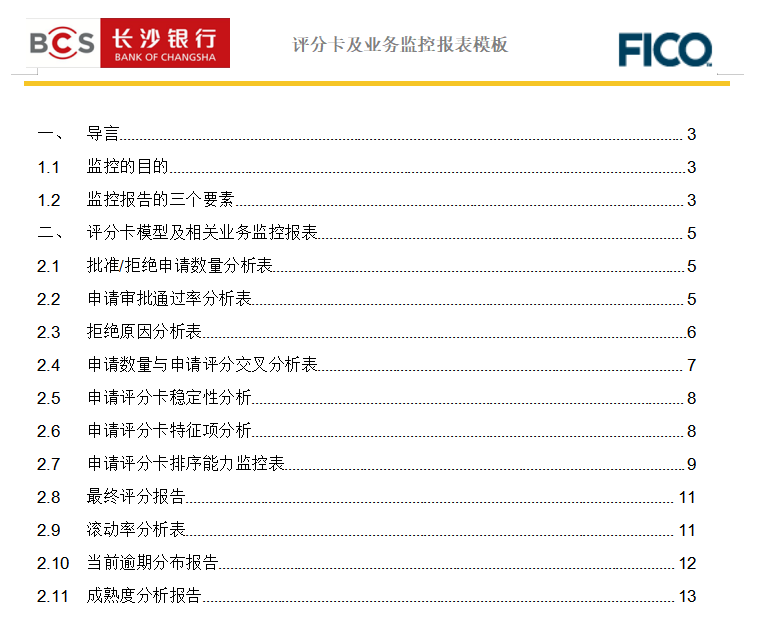

而以前很多线上的小贷公司在这方面其实并不是很严谨，当然，这也依机构而异，小贷利润高，有一点坏账也能赚，whatever~
关于模型监控报告，不同的企业要求不一，不过auc、psi、ks这些是基本的，其它的指标因公司而异，这里不做详细展开了

## 风控领域的风险 

信用风险：主要是借款人在借款后，违约不偿还贷款的风险；

欺诈风险：借款人在借款之前就已经下定决心不还款了

需要注意的是，信用风险和欺诈风险的对应用户不可混为一谈，信用存在风险的用户其违约的潜在因素往往能够通过引入较多优质的特征和模型来进行识别，好坏客户之间的界限相对来说是比较清晰的，但是对于欺诈用户来说，其检测存在很多的问题，首先，对于很多机构来说很头疼的问题，欺诈用户的标签往往非常稀少，这实际上给有监督的模型带来了很大的困难；其次，欺诈往往属于潜在的多分类问题，欺诈的手段是多样化的，所以用户对应的特征也是具有不同分布的；最后，欺诈用户往往将自己伪装为正常用户，在大部分时间段，其特征分布是很正常的，但往往在某个时间段，“集体作案”，常规的二分类模型往往没有这么高的灵敏度。 因此相对于信用评分卡来说，欺诈检测在金融风控的领域中具有更大的挑战性。

## 三种评分卡的区别

1、使用时间的不同，A、B、C卡分别侧重贷前、贷中、贷后；

2、使用的模型上有一定的差异性，A卡常见的算法有逻辑回归和gbdt、B卡大体相同会使用到部分序列模型、C卡则相对更加复杂，包括了还款率模型、账龄滚动模型和失联模型；

3、数据量不同，A卡主要是用户的一些相对静态的信息包括学历、性别、年龄、收入、运营商、多头借贷等；B卡的数据量要更大，主要是增加了用户借款后的行为序列数据；C卡的数据量进一步增大，例如 关联人信息、催收结果反馈等；


## 在实际上三种卡是如何使用的？

1、A卡基本是通用的，银行、互金，即使是早期小型的放贷公司，凡是涉及到模型风控A卡是必备的，之前和行业的前辈咨询过类似的问题，才知道很多小贷公司只有A卡，这也体现出了A卡的重要性。A卡最终的输出就是一个得分，和芝麻信用分的形式是一毛一样的。一般来说根据用户的得分，会卡一个阈值，低于阈值的拒绝，高于阈值的接受，当然不仅如此，借款额度（或者信用卡的额度）、利率等都是和A卡相关的；

2、并不是所有信贷产品都有B卡，对于短周期的信贷产品，用户的行为数据意义可能并不是特别大，一方面短周期下收集到的用户行为信息少，另一方面较难充分体现用户的行为规律，所以房屋贷款这类长周期的信贷产品较为适用，短周期的信贷产品（例如月贷）相对并不是很合适，但是循环贷这类产品也是适合的，因为循环贷随用随贷，随时偿还的特点，其序列特征的数量相对比较大，额度调整、利率调整等于B卡关系较为密切；

3、催收评分卡相对来说更少，并不是说催收不重要，而是因为大部分普通的小型放贷公司不会使用到模型更不会涉及到机器学习的概念来进行催收，一方面小型公司的客户基数并不大，人工催收完全足够，另一方面在小型的问题上，算法的优势并不比人工来的大，简单来说，催收评分卡主要通过对用户“变得更逾期”的概率进行测算从而服务于催收部门，使得催收可以根据用户“变得更坏”的可能性采取不同的催收措施以及。


## 常用特征字段和特征工程方法

关于A卡，相信之前的课程已经总结过了，这里大概说一下B卡和C卡：

B卡相对于A卡引入了序列的概念，所以有一个很重要的特征工程方法——时间窗，说人话就是不同的时间周期下的用户的统计特征，例如过去一个月、三个月、半年内用户的消费记录、还款比例、额度利用率的均值、标准差、最大最小值、总和等统计量； 其它的常用特征字段还有： 根据欠款序列数据判断用户是否发生预期从而衍生出是否预期的bool特征、消费类型类别特征，以信用卡为例：普通消费、取现、透支等信用卡使用行为等，这里不同特征的衍生方案太多，难以一一展开，但是大体的套路基本上就拿一些了不会特别的复杂，业务上的一些衍生逻辑可能每个公司不一样也不好做什么总结；
目前在特征自动衍生方面比较方便的库：

1、tsfresh 针对时序特征进行各类时间序列相关的算子，自动衍生成百上千维新特征；

2、featuretools，深度groupby，多表关联的特征衍生利器，后续有机会会一一在专栏详细介绍这类好用的工具；

C卡：在上述的基础上增加了 用户的社交网络相关信息包括主要联系人信息、运营商信息（高频联系人）等；

找到了一张不错的总结图，
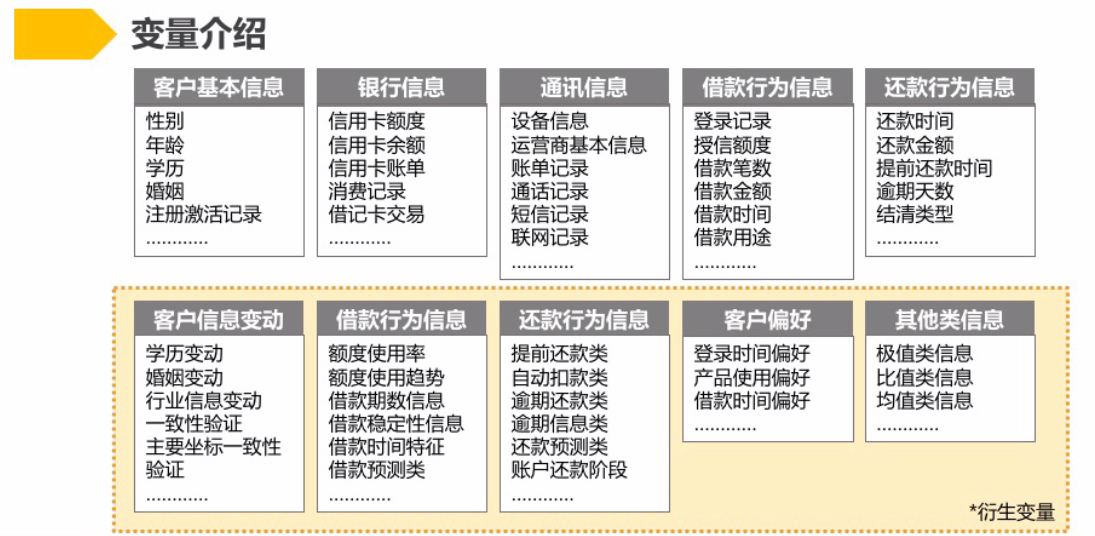